# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Asif

Student name: Jawad
    
ID:2013002

In [3]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [4]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [5]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2013002 # place a random seed
np.random.seed(ID)

In [6]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [7]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [81 56 49 59 65 53 50 53 53 81]


In [7]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


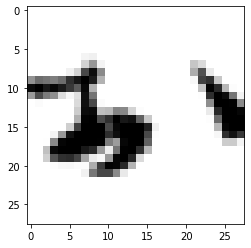

LABEL: 0
INPUT:


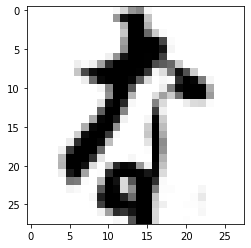

LABEL: 4
INPUT:


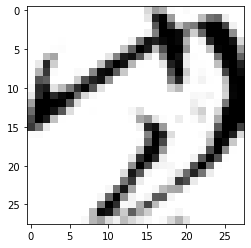

LABEL: 3
INPUT:


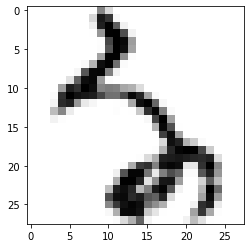

LABEL: 4


In [8]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [9]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

#train linear SVM
linear_m=SVC(kernel='linear')
linear_m.fit(X_train,y_train)
y_predict = linear_m.predict(X_test)

# ADD YOUR CODE

print ('RESULTS FOR LINEAR KERNEL',y_predict)


cross_val= GridSearchCV(SVC(kernel='linear'), parameters, cv=4)
cross_val.fit(X_train, y_train)



print("Best parameters set found:",cross_val.best_params_ )
# ADD YOUR CODE


score = linear_m.score(X_test,y_test)

print("Score with best parameters:",cross_val.best_score_)
# ADD YOUR CODE


print("All scores on the grid:",cross_val.cv_results_ )
# ADD YOUR CODE

RESULTS FOR LINEAR KERNEL [0 4 5 ... 1 6 5]
Best parameters set found: {'C': 0.01}
Score with best parameters: 0.7433333333333333
All scores on the grid: {'mean_fit_time': array([0.10618991, 0.10763884, 0.1095736 , 0.10329574]), 'std_fit_time': array([0.02041808, 0.00833724, 0.01030468, 0.00968009]), 'mean_score_time': array([0.03883266, 0.02575129, 0.01952434, 0.03388298]), 'std_score_time': array([0.01505357, 0.00660679, 0.00676997, 0.01219361]), 'param_C': masked_array(data=[0.01, 0.1, 1, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}], 'split0_test_score': array([0.73333333, 0.72666667, 0.72666667, 0.72666667]), 'split1_test_score': array([0.70666667, 0.66666667, 0.66666667, 0.66666667]), 'split2_test_score': array([0.74666667, 0.76666667, 0.76666667, 0.76666667]), 'split3_test_score': array([0.78666667, 0.78      , 0.78      , 0.78      ]), 'mean_test_score': array([0.74

## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [10]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}


# deg2=SVC(kernel='linear')
# deg2.fit(X_train,y_train)


clf = cross_val= GridSearchCV(SVC(kernel='poly',degree=2), parameters, cv=4)
clf.fit(X_train, y_train)
deg2 = clf.predict(X_test)



#,
# ADD YOUR CODE

print ('RESULTS FOR POLY DEGREE=2 KERNEL',deg2)

print("Best parameters set found:",clf.best_params_)
# ADD YOUR CODE

print("Score with best parameters:",clf.best_score_)
# ADD YOUR CODE

print("\nAll scores on the grid:",clf.cv_results_)
# ADD YOUR CODE

RESULTS FOR POLY DEGREE=2 KERNEL [0 4 1 ... 1 6 5]
Best parameters set found: {'C': 0.01, 'gamma': 0.1}
Score with best parameters: 0.7483333333333333

All scores on the grid: {'mean_fit_time': array([0.16830283, 0.13978684, 0.12988174, 0.1327951 , 0.1171717 ,
       0.12768126, 0.1249916 , 0.12712812, 0.113267  ]), 'std_fit_time': array([0.02427732, 0.03467473, 0.01961426, 0.00782609, 0.00781554,
       0.0137776 , 0.01561886, 0.00235891, 0.00675837]), 'mean_score_time': array([0.029594  , 0.03330976, 0.02962208, 0.02735078, 0.0195328 ,
       0.02343917, 0.02734542, 0.023646  , 0.02735084]), 'std_score_time': array([0.00320019, 0.00355357, 0.00327287, 0.00676782, 0.00676341,
       0.00781369, 0.00676445, 0.00802456, 0.00676758]), 'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data

## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [11]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

# poly_3= SVC(kernel='poly', degree=2)
# poly_3.fit(X_train,y_train)
degree=3
#run SVM with poly of higher degree kernel
clf_3 = cross_val= GridSearchCV(SVC(kernel='poly',degree=3), parameters, cv=4)
clf_3.fit(X_train, y_train)
deg3 = clf.predict(X_test)

# ADD YOUR CODE

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL',deg3)

print("Best parameters set found:",clf_3.best_params_)
# ADD YOUR CODE

print("Score with best parameters:",clf_3.best_score_)
# ADD YOUR CODE

print("\nAll scores on the grid:",clf_3.cv_results_)
# ADD YOUR CODE

RESULTS FOR POLY DEGREE= 3  KERNEL [0 4 1 ... 1 6 5]
Best parameters set found: {'C': 1, 'gamma': 0.01}
Score with best parameters: 0.7083333333333333

All scores on the grid: {'mean_fit_time': array([0.17251229, 0.1357218 , 0.13039005, 0.14777696, 0.12889546,
       0.14060336, 0.12504804, 0.12889379, 0.12502176]), 'std_fit_time': array([2.63599971e-02, 1.52668757e-02, 7.13907059e-03, 7.24756368e-03,
       6.76723447e-03, 1.10551217e-02, 9.06424199e-05, 1.70256500e-02,
       5.87442708e-05]), 'mean_score_time': array([0.03516626, 0.03126311, 0.02752095, 0.02757269, 0.0234378 ,
       0.02344203, 0.02734375, 0.02734524, 0.02344364]), 'std_score_time': array([6.77298572e-03, 7.12668189e-06, 6.87239856e-03, 3.67247749e-03,
       7.81208319e-03, 7.81703223e-03, 6.76554823e-03, 6.76420610e-03,
       7.80684070e-03]), 'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1],
             mask=[False, False, False, False, False, False, False, False,
                   Fals

## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [12]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel

cross_val= GridSearchCV(SVC(kernel='rbf'), parameters, cv=4)
cross_val.fit(X_train, y_train)
y_predictr=cross_val.predict(X_test)


# print(cross_val.score(X_test,y_test))
# ADD YOUR CODE

print ('RESULTS FOR rbf KERNEL',y_predictr)

print("Best parameters set found:",cross_val.best_params_)
# ADD YOUR CODE

print("Score with best parameters:",cross_val.best_score_)
# ADD YOUR CODE

print("\nAll scores on the grid:",cross_val.cv_results_)
# ADD YOUR CODE

RESULTS FOR rbf KERNEL [0 4 3 ... 1 6 5]
Best parameters set found: {'C': 10, 'gamma': 0.01}
Score with best parameters: 0.7933333333333333

All scores on the grid: {'mean_fit_time': array([0.15656555, 0.16048169, 0.16404694, 0.18428677, 0.1540851 ,
       0.30804038, 0.29822773, 0.27679914, 0.1085453 , 0.15624309,
       0.17974472, 0.19138521, 0.1093986 , 0.17186654, 0.17580521,
       0.18361741]), 'std_fit_time': array([5.54525792e-03, 5.71001865e-03, 7.81292802e-03, 7.24938891e-03,
       2.19025899e-02, 7.79048901e-02, 5.09866982e-02, 6.44290459e-02,
       1.11850869e-02, 9.89221641e-06, 1.34881077e-02, 6.76737888e-03,
       5.63397278e-05, 1.10561439e-02, 6.75364455e-03, 6.71369313e-03]), 'mean_score_time': array([0.08031005, 0.07812762, 0.07812232, 0.07981056, 0.09952533,
       0.10784435, 0.15830445, 0.11221266, 0.06640542, 0.07812178,
       0.07421708, 0.07424843, 0.06640273, 0.06643069, 0.08592874,
       0.07030767]), 'std_score_time': array([3.80017472e-03, 8.13597943e

## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

Ans: The reuslt was almost same with linear and Poly degree 2, with increase in degree (3) the best scores decreases by 4 percent and reaeches to 0.70. After shifting to RBF kernel, the best scores increases to 0.79 which means it try to avoid errors and provided the best score.

## TO DO 5
Report here the best SVM kernel and parameters

In [13]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel='rbf',C=10, gamma=0.01) # USE YOUR OPTIMAL PARAMETERS
best_SVM.fit(X_train,y_train)

training_error=best_SVM.score(X_train,y_train)
training_error=1-training_error
# ADD YOUR CODE


test_error=best_SVM.score(X_test,y_test)
test_error=1-test_error


# (error is 1 - svm.score)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.172750


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [14]:
# Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
# print(gamma_values)
print(gamma_values)
l=len(gamma_values)



# for i in range(l):
#         print(gamma_values[i])


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


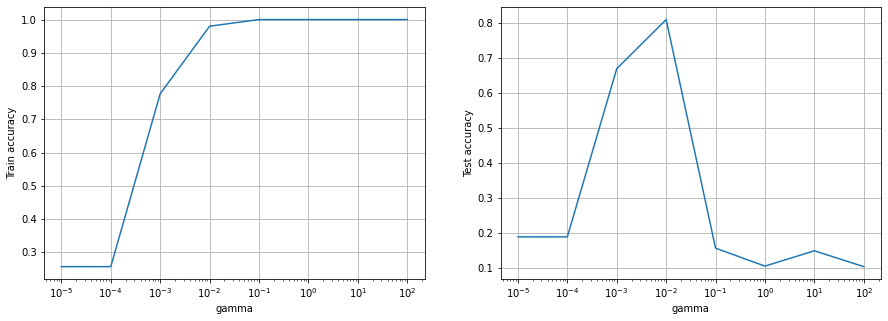

In [15]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list=np.zeros(l)
test_acc_list=np.zeros(l)


# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA

for i in range(l):
    best_SVM = SVC(kernel='rbf',C=1, gamma=gamma_values[i])
    best_SVM.fit(X_train,y_train)
    train_acc_list[i]=best_SVM.score(X_train,y_train)
    test_acc_list[i]=best_SVM.score(X_test,y_test)
    
#     print(train_acc_list,test_acc_list)


# # PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

Ans: Train and test error is dependent on gamma values. By increasing the gamma the train error becomes less and less and appoches 0.0, which means it provides 100% accuracy on training set.

The best value of gamma after observing is 0.01.

With 100% accuracy it overfits the data and will face error on traing set.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [8]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [181 208 191 201 216 213 190 204 190 206]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [17]:
# I Run two time this code and it take almost 2 mins to compute the result for both train and test error

#get training and test error for the best SVM model from CV

# ADD YOUR CODE
best_svm=SVC(kernel='rbf')
best_svm.fit(X_train,y_train)

training_error=best_svm.score(X_train,y_train)
training_error=1-training_error
print ("Best SVM training error: %f" % training_error)

test_error=best_svm.score(X_test,y_test)
test_error=1-test_error
print ("Best SVM test error: %f" % test_error) # validatio error

Best SVM training error: 0.018500
Best SVM test error: 0.123310


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [18]:
from sklearn import linear_model

# ADD YOUR CODE

log_r=linear_model.LogisticRegression(C=1000000000)
log_r.fit(X_train,y_train)
training_error=1-log_r.score(X_train,y_train)
test_error=1-log_r.score(X_test,y_test)




print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.297310


## TO DO 9 Try  with regularization (use C=1)¶

In [19]:
# ADD YOUR CODE
log_r=linear_model.LogisticRegression(C=1,max_iter=1e9)
log_r.fit(X_train,y_train)
training_error=1-log_r.score(X_train,y_train)
test_error=1-log_r.score(X_test,y_test)
print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.002000
Best regularized logistic regression test error: 0.257672


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

Ans: 1: By increasing the Training samples, The train and test error are significantly reduceses and provided the low test error as we increase the training set.

2: The test error on logistic regression is way more than SVM, the reason is that in Logistic regression we randomly selected the value of C.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [20]:


# Prediction_r = log_r.predict(X_test)
# cm = skm.confusion_matrix(y_test, Prediction_r)

misclassified_r = np.where(y_test != log_r.predict(X_test))
print(misclassified_r)




# Prediction_svm = best_svm.predict(X_test)




# print(Prediction_svm)
# LR_prediction = # ADD CODE
# SVM_prediction = # ADD CODE 

         
    
    
    
    
                                     

# ADD CODE

(array([    0,     7,     9, ..., 57985, 57994, 57996], dtype=int64),)


In [21]:
print('l')
misclassified_svm = np.where(y_test != best_svm.predict(X_test))
print(misclassified_svm)

l
(array([    9,    19,    33, ..., 57954, 57964, 57977], dtype=int64),)


## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [22]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

Prediction_r=log_r.predict(X_test)
Prediction_svm=best_svm.predict(X_test)


u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test, Prediction_r)# ADD CODE
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = skm.confusion_matrix(y_test, Prediction_svm)  # ADD CODE
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5819 5792 5809 5799 5784 5787 5810 5796 5810 5794]

 Confusion matrix SVM  
 
 [[4849    9   17   37  263  203   25  230   46  140]
 [  20 4113  387  101  315   58  282   27  216  273]
 [   2  369 3771  180  185  192  469  138  308  195]
 [  17  185  191 4437  191  428   48  103  136   63]
 [ 177  218  326  133 4350   93  149   98   52  188]
 [  61  140  215  176  118 4784   79   89   85   40]
 [  14  275  825   86  217   46 3960  115  181   91]
 [ 104   34  205  125  209  153  135 4664   59  108]
 [  61  377  463  225  158  230  216   26 3926  128]
 [  80  411  470   37  232   81   59  110  113 4201]]

 Confusion matrix SVM (normalized)   
 
 [[0.83 0.   0.   0.01 0.05 0.03 0.   0.04 0.01 0.02]
 [0.   0.71 0.07 0.02 0.05 0.01 0.05 0.   0.04 0.05]
 [0.   0.06 0.65 0.03 0.03 0.03 0.08 0.02 0.05 0.03]
 [0.   0.03 0.03 0.77 0.03 0.07 0.01 0.02 0.02 0.01]
 [0.03 0.04 0.06 0.02 0.75 0.02 0.03 0.02 0.01 0.03]
 [0.01 0.02 0.04 0.03 0.02 0.83 0.01 0.02 0.0

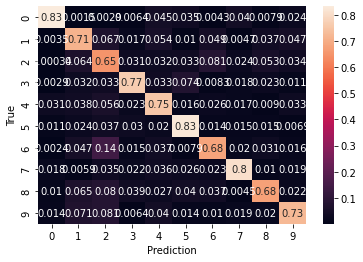

Text(33.0, 0.5, 'True')

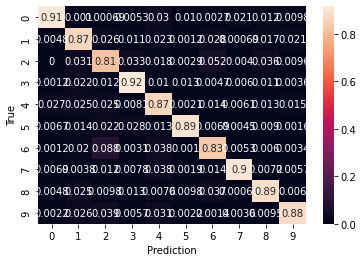

In [23]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX

norm_con_svm = confusion_SVM /counts[:,None]
norm_log_r = confusion_LR /counts[:,None]

import seaborn as sn
sn.heatmap(norm_con_svm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

sn.heatmap(norm_log_r, annot=True)
plt.xlabel('Prediction')
plt.ylabel('True')


## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


Ans : The confusion matrix also provides the similar result as we have calculated by standard SVM and Logistic Regression. SVM performs more better than Logistic Regression. and have High accuracy. The classes act as similar as thier score mataches each other.